In [1]:
import matplotlib.pyplot as plt
from aizynthfinder.aizynthfinder import AiZynthFinder
from aizynthfinder.chem import Molecule
from rdkit import Chem
from rdkit.Chem.Draw import MolToImage
from aizynthfinder.reactiontree import ReactionTree
import queue

In [2]:
# 初始化 AiZynthFinder
filename = r"C:\Users\77936\Desktop\MetooRetro\data\config.yml"
finder = AiZynthFinder(filename)
# 选择库存、扩展策略和过滤策略
finder.stock.select("zinc")
finder.expansion_policy.select("change")
finder.filter_policy.select("uspto")
# 设置目标 SMILES
finder.target_smiles = "Cc1cccc(c1N(CC(=O)Nc2ccc(cc2)c3ncon3)C(=O)C4CCS(=O)(=O)CC4)C"

                                                  retro_template  \
template_code                                                      
0              [#7;a:4]:[c:3]:[c;H0;D3;+0:1](-[I;H0;D1;+0:5])...   
1              [N;D1;H0:4]#[C:3]-[CH2;D2;+0:1]-[c:2]>>C-C(-C)...   
2              [C:3]=[C:2]-[CH2;D2;+0:1]-[S;H0;D2;+0:4]-[c;H0...   
3              [#7;a:4]:[c:5]1:[#7;a:6]:[c:7]:[c;H0;D3;+0:8](...   
4              [C:11]-[N;H0;D3;+0:12](-[C:13])-[CH2;D2;+0:3]-...   
...                                                          ...   
42549          [O;D1;H0:2]=[C;H0;D3;+0:1](-[c:3])-[NH;D2;+0:4...   
42550          [C;H0;D4;+0:4]1-[CH2;D2;+0:1]-[CH2;D2;+0:2]-[C...   
42551          [Cl;H0;D1;+0:1]-[c;H0;D3;+0:5]1:[#8;a:4]:[c:3]...   
42552          [#7:4]-[C:5](=[O;D1;H0:6])-[c:7]1:[c:8]:[c:9]:...   
42553          [#7;a:2]:[nH;D2;+0:1]:[c:3]>>C-O-C(=O)-[n;H0;D...   

                                                   template_hash  \
template_code                                  

In [3]:
# 执行树搜索
finder.tree_search()
finder.build_routes()

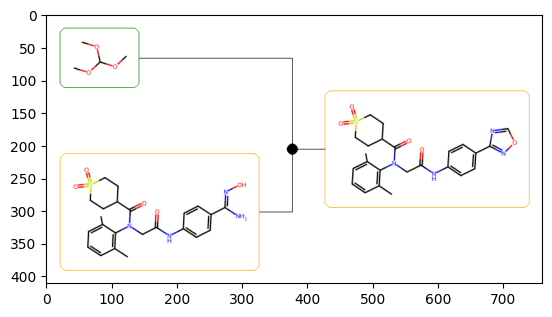

In [4]:
tree = finder.routes.reaction_trees[0]
plt.imshow(tree.to_image())
plt.show()

In [5]:
tree = ReactionTree.from_dict(tree.to_dict())
tree.to_json()

'{\n  "type": "mol",\n  "hide": false,\n  "smiles": "Cc1cccc(C)c1N(CC(=O)Nc1ccc(-c2ncon2)cc1)C(=O)C1CCS(=O)(=O)CC1",\n  "is_chemical": true,\n  "in_stock": false,\n  "children": [\n    {\n      "type": "reaction",\n      "hide": false,\n      "smiles": "[c:1]1[n:2][c:3](-[cH3:4])[n:5][o:6]1>>CO[C:1](OC)OC.[N:2][C:3]([cH3:4])=[N:5][O:6]",\n      "is_reaction": true,\n      "metadata": {\n        "template_hash": "87073c9c5167aa33159c5081e1bb4f375de80978da99509ad31fb2007de092af",\n        "classification": "0.0 Unrecognized",\n        "library_occurence": 8,\n        "conditions": 1,\n        "policy_probability": 0.3416999876499176,\n        "policy_probability_rank": 0,\n        "policy_name": "change",\n        "template_code": 2778,\n        "template": "[c;H0;D3;+0:4]-[c;H0;D3;+0:3]1:[n;H0;D2;+0:2]:[cH;D2;+0:1]:[o;H0;D2;+0:6]:[n;H0;D2;+0:5]:1>>C-O-[CH;D3;+0:1](-O-C)-O-C.[NH2;D1;+0:2]-[C;H0;D3;+0:3](-[c;H0;D3;+0:4])=[N;H0;D2;+0:5]-[OH;D1;+0:6]",\n        "mapped_reaction_smiles": "[C